# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

from tqdm.notebook import tqdm

/tmp/ipykernel_553165/2044819698.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("./Data/train.csv") # 학습용 데이터
df_test = pd.read_csv("./Data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

In [6]:
df = pd.concat([df_train.drop("is_converted", axis=1), df_test.drop(["id", "is_converted"], axis=1)], ignore_index=True)
df

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64565,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,NaN,...,associate/analyst,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97
64566,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,NaN,...,none,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438
64567,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,manager,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97
64568,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,NaN,...,none,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429


In [7]:
def wordcloud_visualize(df):

    # 토큰과 빈도수를 따로 분리합니다.
    tokens = list(df.value_counts().keys())
    frequencies = df.value_counts()

    # 상위 n개의 토큰만 선택하여 시각화할 수도 있습니다.
    n = 50
    top_tokens = tokens[:n]
    top_frequencies = frequencies[:n]

    # 막대 그래프로 시각화합니다.
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_tokens)), top_frequencies, tick_label=top_tokens)
    plt.xlabel('Token')
    plt.ylabel('Frequency')
    plt.title('Top {} Tokens Frequency'.format(n))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # 워드 클라우드로 시각화합니다.
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Tokens')
    plt.show()

In [38]:
def target_visualize(df, x, target, top_n):

    tokens = list(df[x].value_counts().keys())
    n = top_n
    top_tokens = tokens[:n]
    
    temp_df = df[df[x].isin(top_tokens)]

    # bar plot
    temp_df[target] = temp_df[target].astype(str)
    sns.countplot(x=x, hue=target, data=temp_df, order=top_tokens, palette='viridis')

    # Calculate proportions for each category of 'target'
    total_counts = temp_df.groupby(x)[target].count()
    total_counts = total_counts.sum()
    for patch in plt.gca().patches:
        height = patch.get_height()
        plt.text(patch.get_x() + patch.get_width()/2., height + 0.05,
                 '{:.1f}%'.format(100 * height / total_counts), ha='center')

    # Calculate relative proportions for True and False
    for i, label in enumerate(plt.gca().get_xticklabels()):
        x_val = label.get_text()
        if temp_df[x].dtype == 'int64':
            x_val = int(x_val)
        elif temp_df[x].dtype == 'float64':
            x_val = float(x_val)
    
        true_ratio = temp_df[(temp_df[x] == x_val) & (temp_df[target] == 'True')].shape[0] / (temp_df[temp_df[x] == x_val].shape[0])
        plt.text(label.get_position()[0], label.get_position()[0] - 1500, '{:.1f}%'.format(true_ratio * 100), ha='center', va='top')


    plt.title(f'Top {n} Distribution of {x} by {target} ')
    plt.xlabel(f'{x}')
    plt.ylabel('Count')

    plt.legend(title=target, loc='upper left')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## 2. 데이터 EDA

### Custmer country: 고객의 국적

In [9]:
cus_country = df['customer_country']
len(cus_country)

64570

In [10]:
cus_country.value_counts()

customer_country
//India                                         3055
/São Paulo/Brazil                               1376
//United States                                 1122
//United Kingdom                                 807
//Saudi Arabia                                   719
                                                ... 
/ Mato Grosso do Sul - Campo Grande / Brazil       1
600 FREMONT ST   / LAS VEGAS / United States       1
/ São Paulo/Marilia  / Brazil                      1
/ East Delhi / Saudi Arabia                        1
via a.rosario snc   / frattaminore / Italy         1
Name: count, Length: 17480, dtype: int64

In [11]:
cus_country.nunique()

17480

In [12]:
cus_country.isna().sum()

982

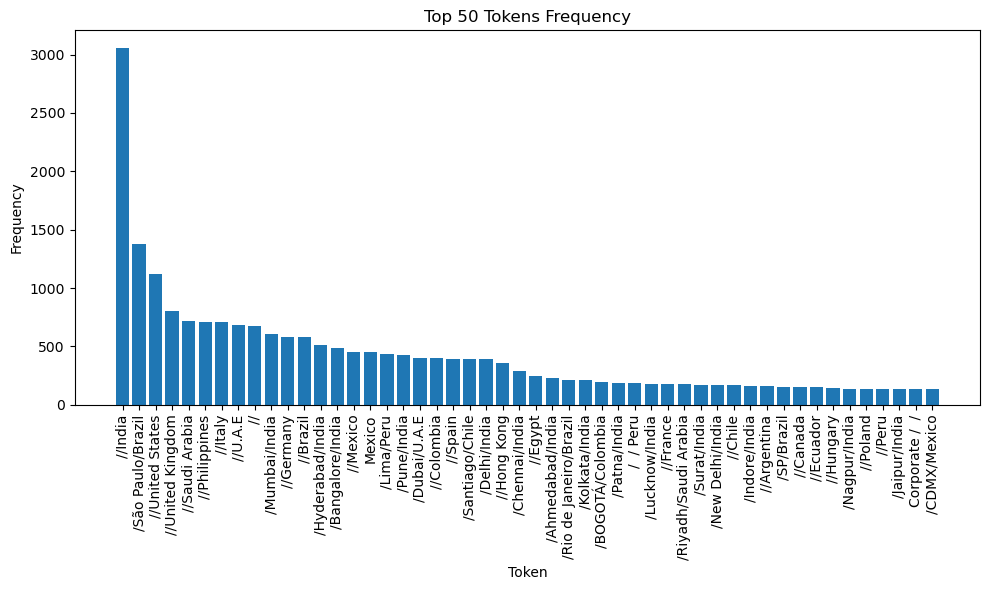

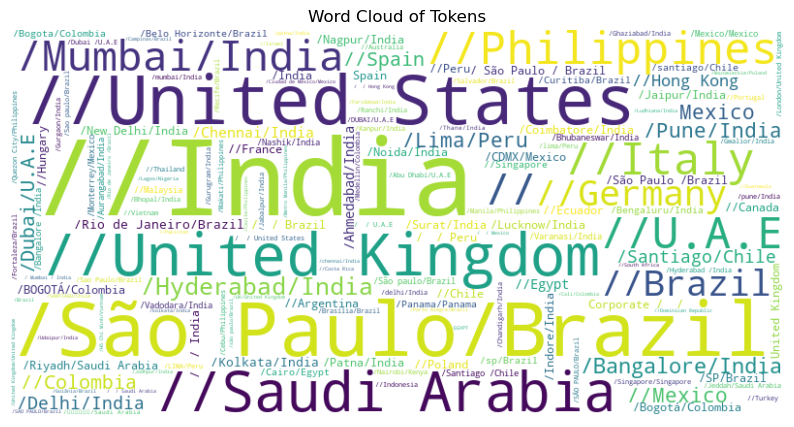

In [39]:
wordcloud_visualize(cus_country)

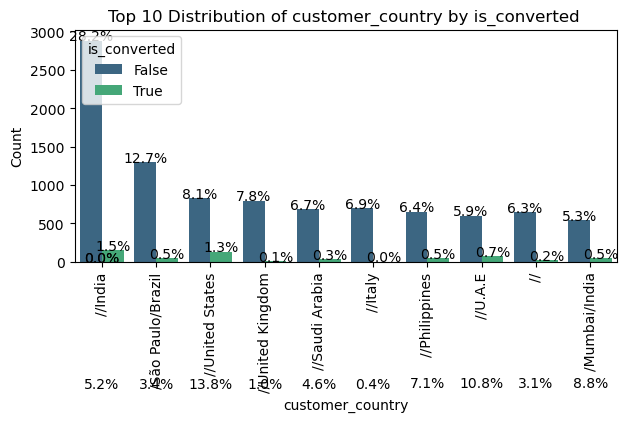

In [40]:
target_visualize(df_train, 'customer_country', 'is_converted', 10)

#### 전처리 idea
##### 1. 도시 빼고 나라만 
##### 2. 도시만 빼서 feature 추가 생성(도시 없을 경우 그 나라 수도로)
##### 3. //는 결측치로 처리 -> None으로 바꾸기(혹은 회사 참고)
##### 4. 대륙 추가

### customer_idx: 고객의 회사명

In [41]:
cus_idx = df['customer_idx']
cus_idx

0        32160
1        23122
2         1755
3         4919
4        17126
         ...  
64565    40292
64566    47466
64567    46227
64568    45667
64569    23646
Name: customer_idx, Length: 64570, dtype: int64

In [42]:
cus_idx.value_counts()

customer_idx
47466    8049
25096    2421
37680     381
18030     333
21321     173
         ... 
6084        1
20161       1
30979       1
27348       1
34420       1
Name: count, Length: 38736, dtype: int64

In [43]:
cus_idx.nunique()

38736

In [44]:
cus_idx.isna().sum()

0

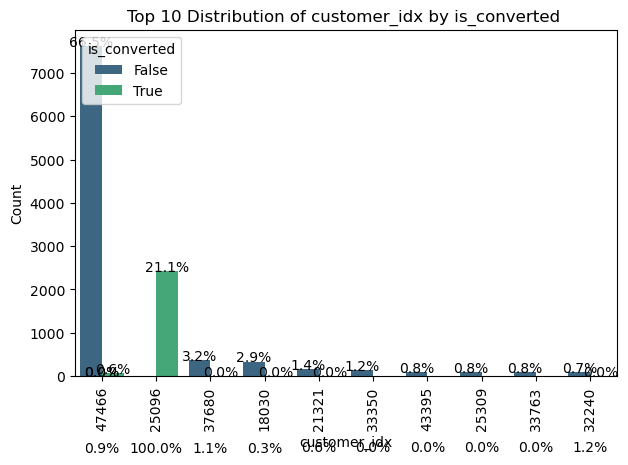

In [45]:
target_visualize(df_train, 'customer_idx', 'is_converted', 10)

##### 사용하는 게 좋을듯(범주형 변수로 처리하면 좋을듯)

### customer_type: 고객 유형

In [46]:
cus_type = df['customer_type']
cus_type

0                 End-Customer
1                 End-Customer
2                 End-Customer
3                 End-Customer
4        Specifier/ Influencer
                 ...          
64565                      NaN
64566                      NaN
64567    Specifier/ Influencer
64568             End Customer
64569             End Customer
Name: customer_type, Length: 64570, dtype: object

In [47]:
cus_type.value_counts()

customer_type
End-Customer                    6648
End Customer                    6449
Specifier/ Influencer           3313
Channel Partner                 1695
Service Partner                  447
Solution Eco-Partner             292
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         18
Technician                        16
Consultant                        15
Home Owner                        10
Other                             10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Reseller                           5
Homeowner                          5
Architect/Consultant               5
Interior Designer                  5
Installer                          5
Distributor                        4
Others                  

In [48]:
cus_type.nunique()

33

In [49]:
cus_type.isna().sum()

45418

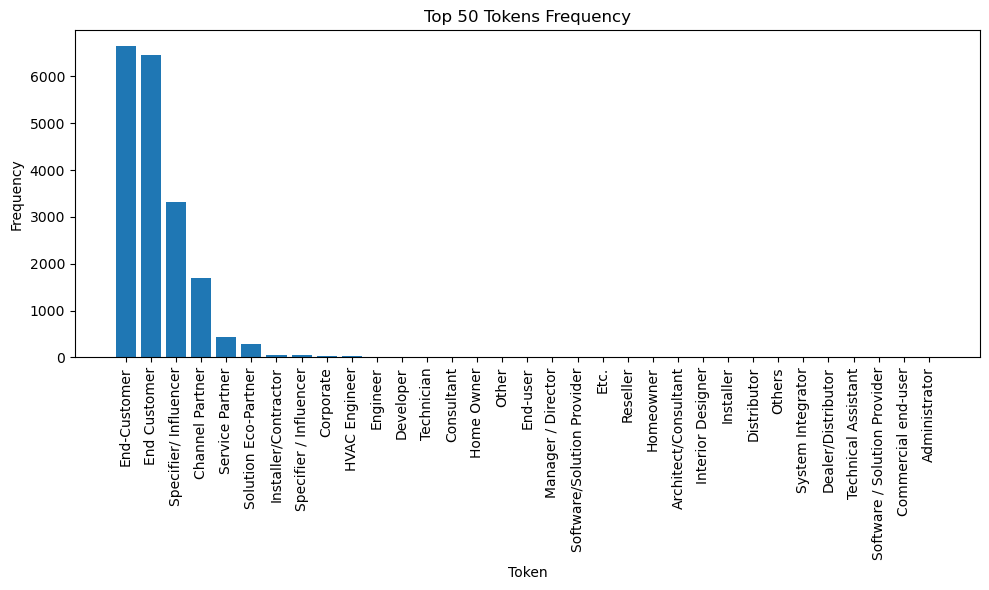

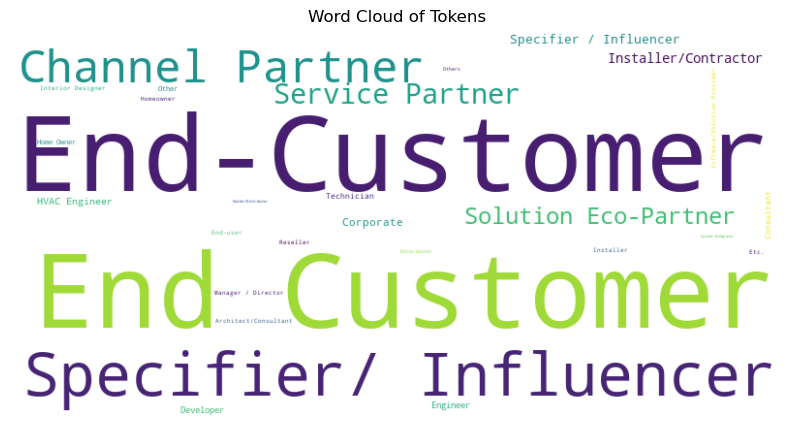

In [50]:
wordcloud_visualize(cus_type)

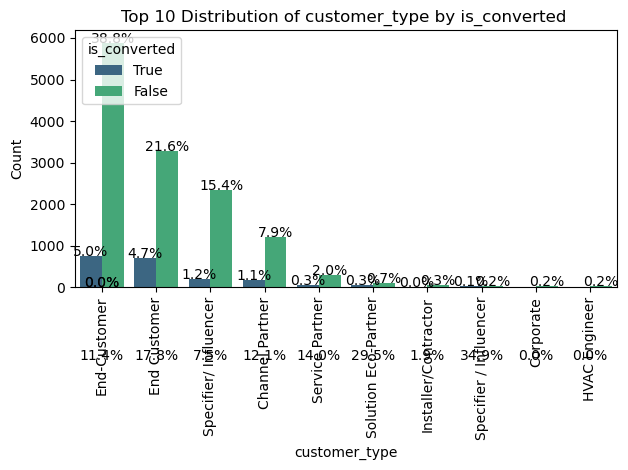

In [51]:
target_visualize(df_train, 'customer_type', 'is_converted', 10)

#### 전처리 idea
##### 1. 결측치가 너무 많고 특정 값이 많이 나옴 -> drop 고려(혹은 최빈값이나 Other, None로 채우기)
##### 2. End-Customer, Specifier / Influencer, (Etc Others Other) 등 동일한데 다른 값 저장된 데이터 통일 필요

### customer_job: 고객의 직업군

In [52]:
cus_job = df['customer_job']
cus_job

0                     purchasing
1        media and communication
2                    engineering
3               entrepreneurship
4                     consulting
                  ...           
64565                      sales
64566                        NaN
64567           entrepreneurship
64568                        NaN
64569                        NaN
Name: customer_job, Length: 64570, dtype: object

In [53]:
cus_job.value_counts()

customer_job
engineering                   7070
other                         4876
administrative                3666
education                     2695
sales                         2380
                              ... 
facilities and operations        1
technical / decision maker       1
installation and purchaser       1
hr posting                       1
part of video wall               1
Name: count, Length: 562, dtype: int64

In [54]:
cus_job.nunique()

562

In [55]:
cus_job.isna().sum()

20172

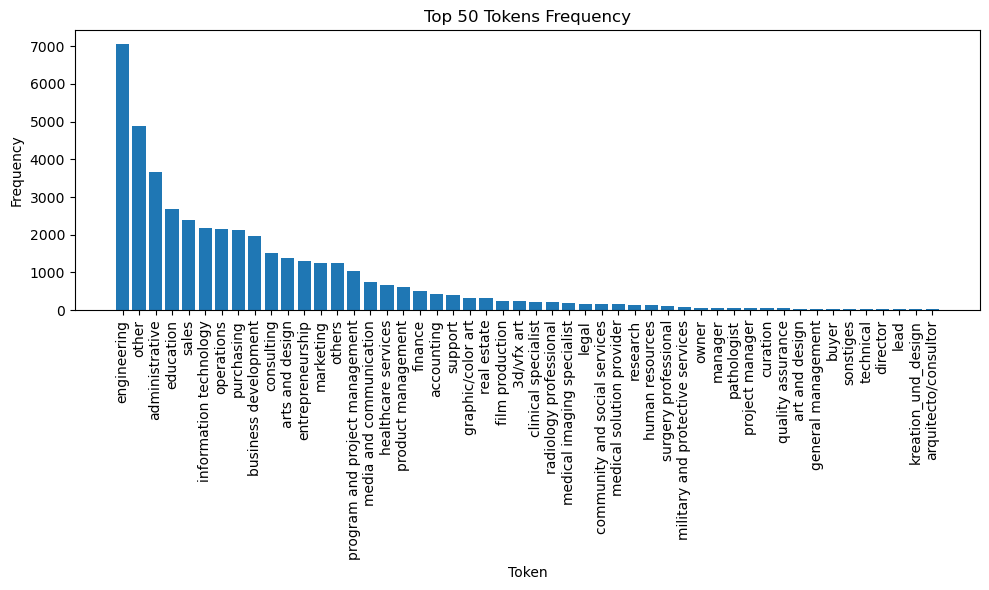

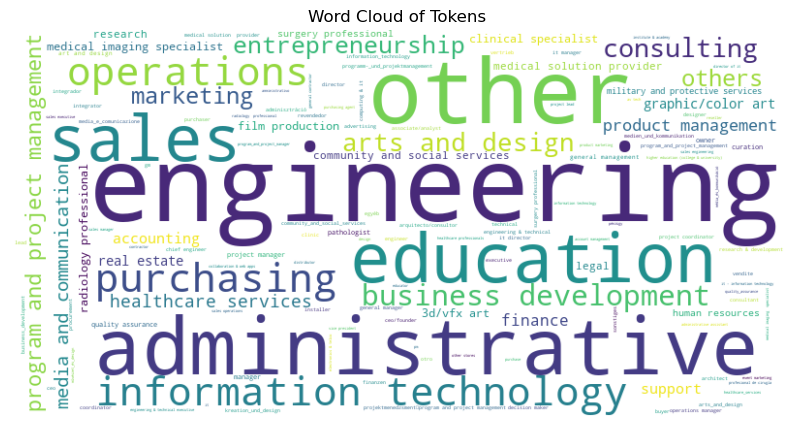

In [56]:
wordcloud_visualize(cus_job)

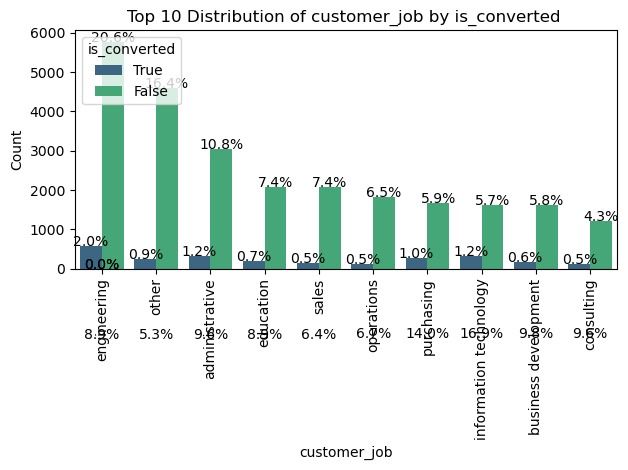

In [57]:
target_visualize(df_train, 'customer_job', 'is_converted', 10)

#### 전처리 idea
##### 1. 결측치가 많음(최빈값이나 Other, None으로 채우기)
##### 2. (Others, Other) 등 동일한데 다른 값 저장된 데이터 통일 필요

### customer_country.1: 담당 자사 법인명 기반의 지역 정보(대륙)

In [27]:
df[['customer_country', 'customer_country.1']]

,customer_country,customer_country.1
0,/Quezon City/Philippines,/Quezon City/Philippines
1,/PH-00/Philippines,/PH-00/Philippines
2,/Kolkata /India,/Kolkata /India
3,/Bhubaneswar/India,/Bhubaneswar/India
4,/Hyderabad/India,/Hyderabad/India
...,...,...
64565,/São Paulo/Brazil,/São Paulo/Brazil
64566,General / / United States,General / / United States
64567,/ OURO BRANCO / Brazil,/ OURO BRANCO / Brazil
64568,/ / Germany,/ / Germany


In [28]:
same_rows = df[df['customer_country'] == df['customer_country.1']]
same_rows[['customer_country', 'customer_country.1']]

,customer_country,customer_country.1
0,/Quezon City/Philippines,/Quezon City/Philippines
1,/PH-00/Philippines,/PH-00/Philippines
2,/Kolkata /India,/Kolkata /India
3,/Bhubaneswar/India,/Bhubaneswar/India
4,/Hyderabad/India,/Hyderabad/India
...,...,...
64565,/São Paulo/Brazil,/São Paulo/Brazil
64566,General / / United States,General / / United States
64567,/ OURO BRANCO / Brazil,/ OURO BRANCO / Brazil
64568,/ / Germany,/ / Germany


In [29]:
different_rows = df[df['customer_country'] != df['customer_country.1']]
different_rows[['customer_country', 'customer_country.1']]

,customer_country,customer_country.1
106,NaN,NaN
121,NaN,NaN
142,NaN,NaN
949,NaN,NaN
1005,NaN,NaN
...,...,...
59118,NaN,NaN
59119,NaN,NaN
59196,NaN,NaN
59252,NaN,NaN


In [30]:
different_rows[['customer_country', 'customer_country.1']].isna().value_counts()

customer_country  customer_country.1
True              True                  982
Name: count, dtype: int64

##### customer country랑 같음 지워도될듯

### customer_position: 고객의 회사 직책

In [58]:
cus_pos = df['customer_position']
cus_pos

0              entry level
1              ceo/founder
2                  partner
3              ceo/founder
4                  partner
               ...        
64565    associate/analyst
64566                 none
64567              manager
64568                 none
64569                 none
Name: customer_position, Length: 64570, dtype: object

In [59]:
cus_pos.value_counts()

customer_position
none                                                  21637
manager                                                8943
ceo/founder                                            8577
other                                                  6524
director                                               5186
                                                      ...  
técnico                                                   1
quantitative aptitude faculty                             1
english trainer for ielts,toefl,pte,gre,sat exams.        1
associate professor                                       1
architecture/consult                                      1
Name: count, Length: 118, dtype: int64

In [60]:
cus_pos.nunique()

118

In [61]:
cus_pos.isna().sum()

0

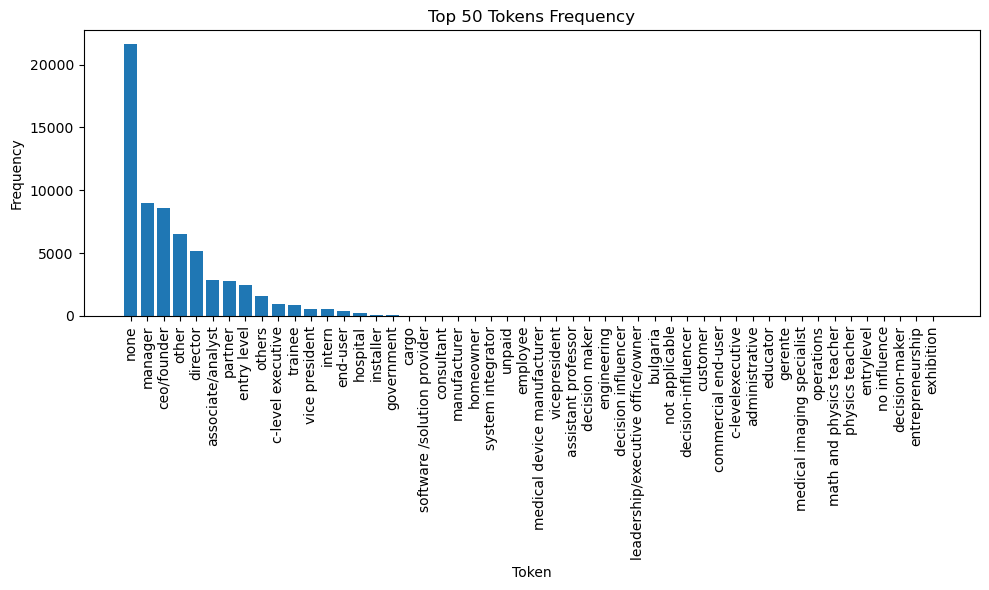

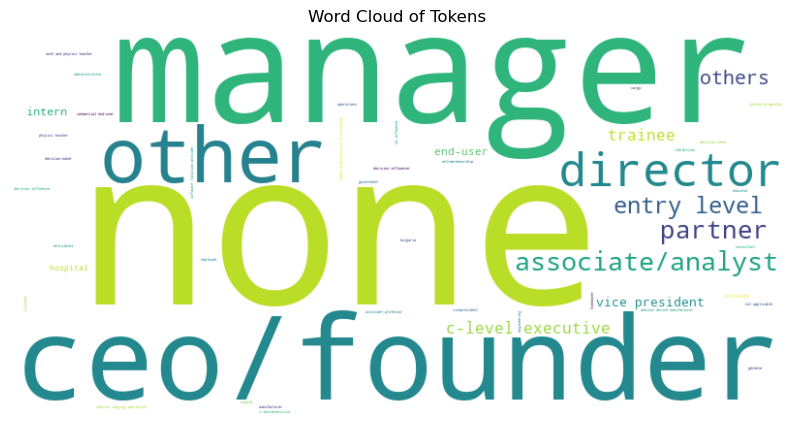

In [62]:
wordcloud_visualize(cus_pos)

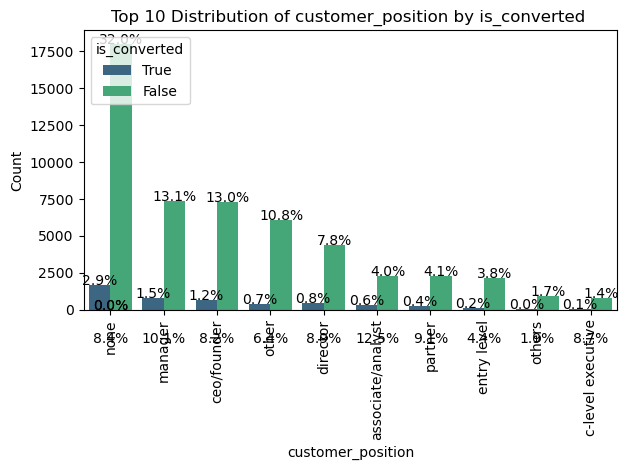

In [64]:
target_visualize(df_train, 'customer_position', 'is_converted', 10)

#### 전처리 idea
##### 1. 결측치가 많음 -> None이 2만개 이상
##### 2. (Others, Other) 등 동일한데 다른 값 저장된 데이터 통일 필요